<a href="https://colab.research.google.com/github/syedaquib153/Rain-Fall-Prediction-Aquib/blob/main/RainFall_Prediction_Models_Aquib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#mporting libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [72]:
#from google.colab import drive
#drive.mount('/content/drive')

In [73]:
#data import
path='/content/new_data_2.csv'
df =pd.read_csv(path,  error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [74]:
df.head()

,time,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,01-01-2020,51,21.2,1.0,4,15.6,114,3.16
1,02-01-2020,51,21.7,0.8,5,12.9,127,3.08
2,03-01-2020,3,22.8,0.0,0,11.9,145,3.86
3,04-01-2020,2,23.1,0.0,0,8.0,198,3.83
4,05-01-2020,3,23.1,0.0,0,13.9,126,3.79


In [75]:
df.tail()

,time,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
1092,28-12-2022,3,21.7,0.0,0,12.6,101,3.69
1093,29-12-2022,2,20.7,0.0,0,12.4,96,4.24
1094,30-12-2022,0,20.0,0.0,0,11.7,92,4.25
1095,31-12-2022,1,19.9,0.0,0,8.1,89,4.17
1096,01-01-2023,1,19.9,0.0,0,11.3,78,4.25


In [76]:
df.isnull().sum()

time                               0
weathercode (wmo code)             0
temperature_2m_mean (°C)           0
rain_sum (mm)                      0
precipitation_hours (h)            0
windspeed_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
dtype: int64

Inference: There is no null values present

In [77]:
df.columns

Index(['time', 'weathercode (wmo code)', 'temperature_2m_mean (°C)',
       'rain_sum (mm)', 'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [78]:
df.describe()

,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,31.889699,22.715223,3.179307,4.805834,15.326345,180.746582,4.034521
std,27.314197,2.169950,6.190819,6.293871,5.236588,96.533208,1.360912
min,0.000000,16.500000,0.000000,0.000000,5.100000,0.000000,0.340000
25%,2.000000,21.300000,0.000000,0.000000,11.700000,98.000000,3.100000
50%,51.000000,22.400000,0.200000,2.000000,14.700000,176.000000,3.950000
75%,55.000000,23.900000,4.000000,8.000000,17.900000,265.000000,4.970000
max,65.000000,29.000000,57.500000,24.000000,36.900000,360.000000,7.490000


**Data cleaning and Visualization**

In [79]:

#defining a datainfoAll
def datainfoAll(df):
   print(f"Dataset Shape: {df.shape}")
   print("-"*125)
   summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
   summary = summary.reset_index()
   summary['Name'] = summary['index']
   summary = summary[['Name','dtypes']]
   summary['Missing'] = df.isnull().sum().values    
   summary['Uniques'] = df.nunique().values
   summary['First Value'] = df.iloc[0].values
   summary['Second Value'] = df.iloc[1].values
   return summary

In [80]:
datainfoAll(df)

Dataset Shape: (1097, 8)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,time,object,0,1097,01-01-2020,02-01-2020
1,weathercode (wmo code),int64,0,10,51,51
2,temperature_2m_mean (°C),float64,0,110,21.2,21.7
3,rain_sum (mm),float64,0,177,1.0,0.8
4,precipitation_hours (h),int64,0,25,4,5
5,windspeed_10m_max (km/h),float64,0,227,15.6,12.9
6,winddirection_10m_dominant (°),int64,0,320,114,127
7,et0_fao_evapotranspiration (mm),float64,0,476,3.16,3.08


Nan Values are more

In [81]:
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


,time,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)


No Dublicates where found

In [82]:
#Dropping all the NaN Values
df.dropna()

,time,weathercode (wmo code),temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,01-01-2020,51,21.2,1.0,4,15.6,114,3.16
1,02-01-2020,51,21.7,0.8,5,12.9,127,3.08
2,03-01-2020,3,22.8,0.0,0,11.9,145,3.86
3,04-01-2020,2,23.1,0.0,0,8.0,198,3.83
4,05-01-2020,3,23.1,0.0,0,13.9,126,3.79
...,...,...,...,...,...,...,...,...
1092,28-12-2022,3,21.7,0.0,0,12.6,101,3.69
1093,29-12-2022,2,20.7,0.0,0,12.4,96,4.24
1094,30-12-2022,0,20.0,0.0,0,11.7,92,4.25
1095,31-12-2022,1,19.9,0.0,0,8.1,89,4.17


In [83]:
#Dropping All NaN Values in date_added_columns
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (1097, 8)
After dropping the NaN values from date_added now the shape is (1097, 8)


In [84]:
df.nunique()

time                               1097
weathercode (wmo code)               10
temperature_2m_mean (°C)            110
rain_sum (mm)                       177
precipitation_hours (h)              25
windspeed_10m_max (km/h)            227
winddirection_10m_dominant (°)      320
et0_fao_evapotranspiration (mm)     476
dtype: int64

In [85]:
df.columns

Index(['time', 'weathercode (wmo code)', 'temperature_2m_mean (°C)',
       'rain_sum (mm)', 'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [86]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [87]:
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Numerical Features Count 7
Discrete feature Count 1
Continuous feature Count 6


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


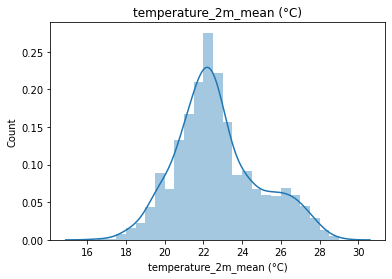

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


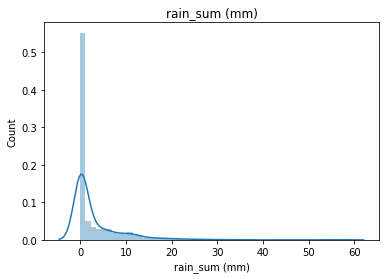

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


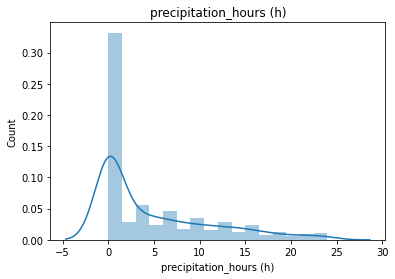

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


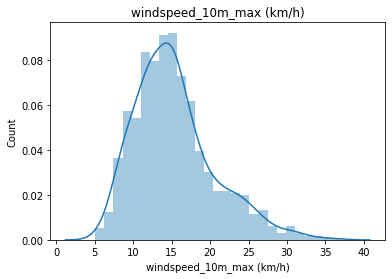

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


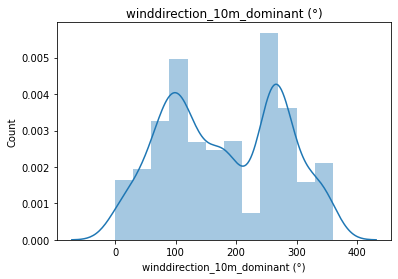

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


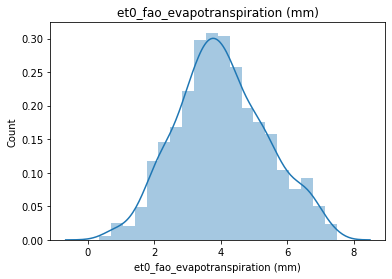

<Figure size 1080x1080 with 0 Axes>

In [88]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

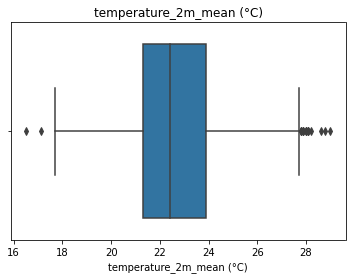

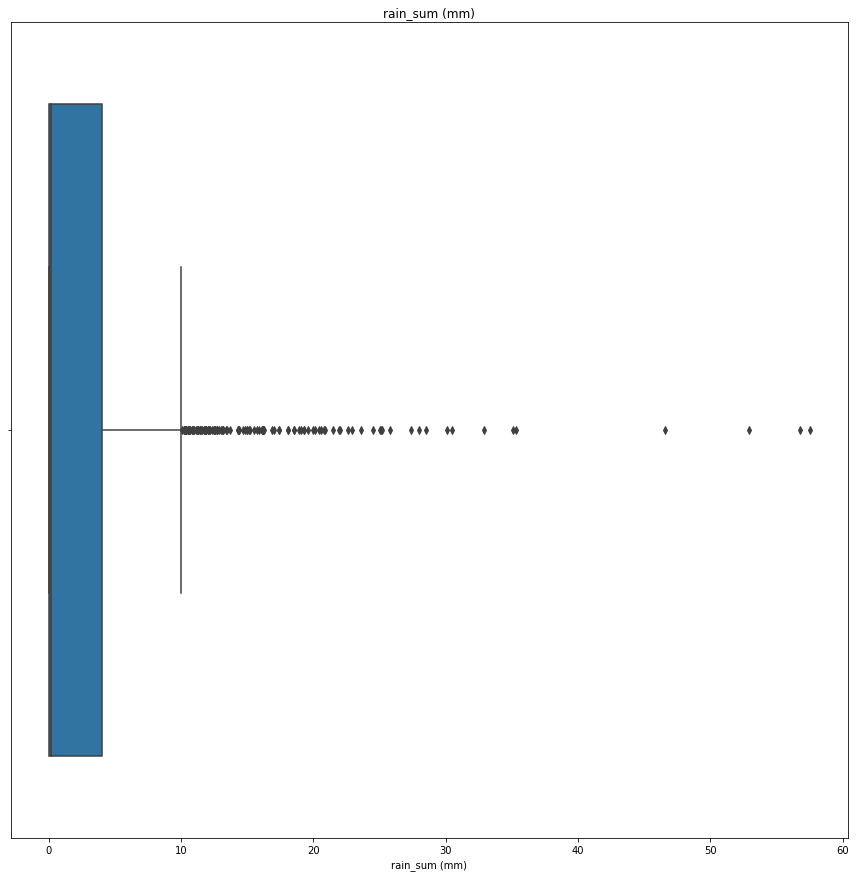

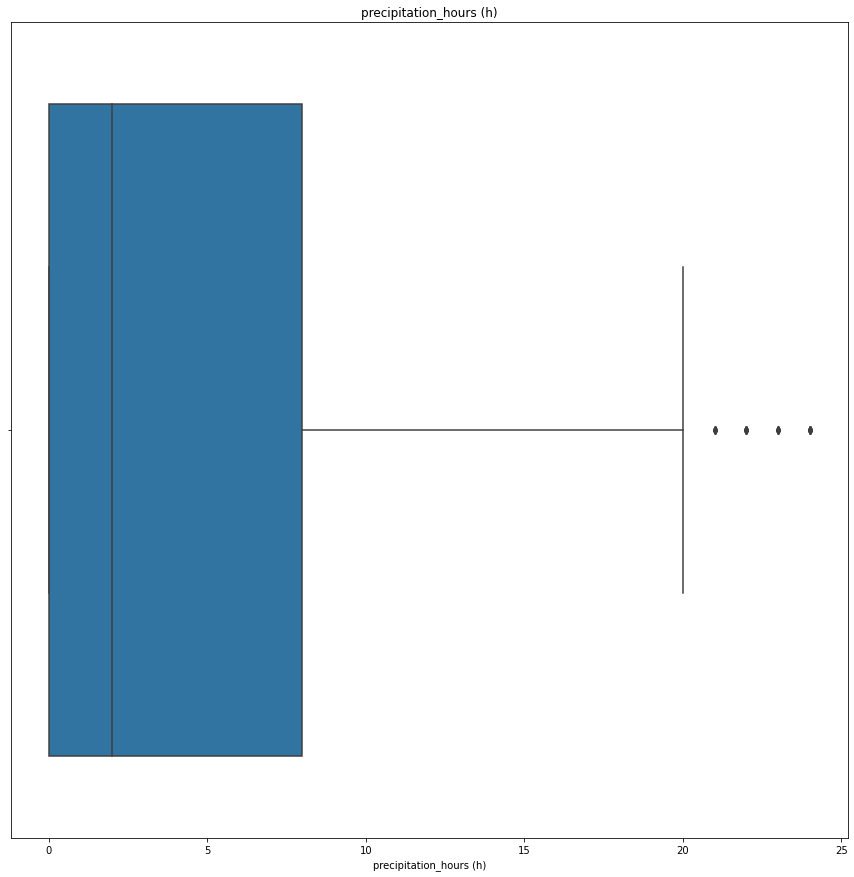

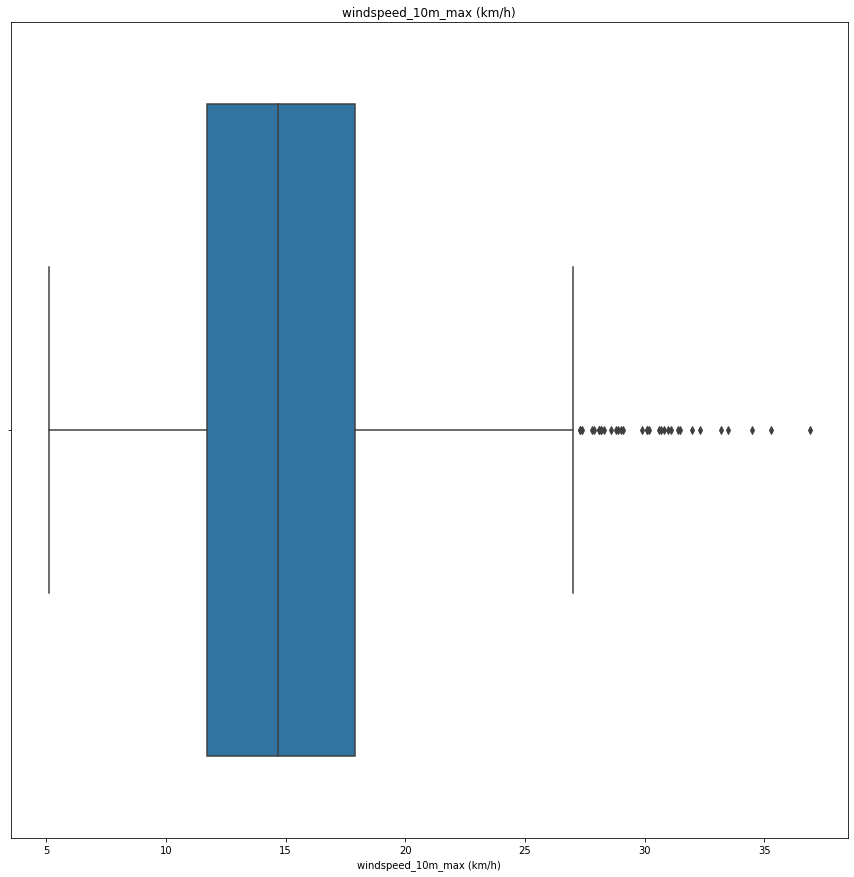

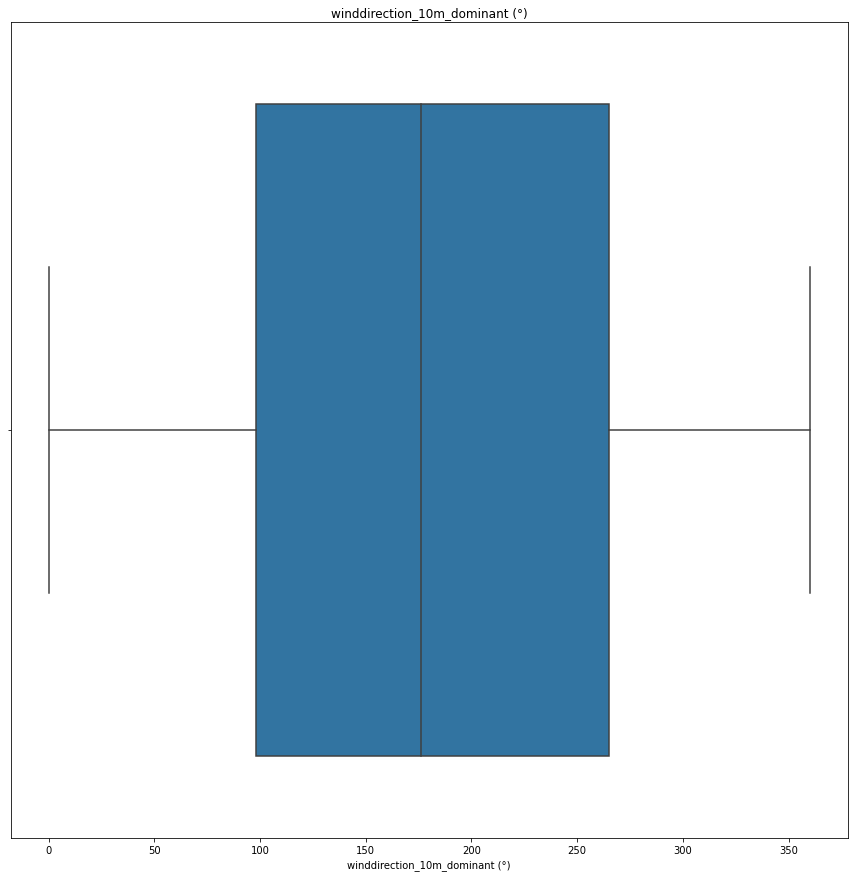

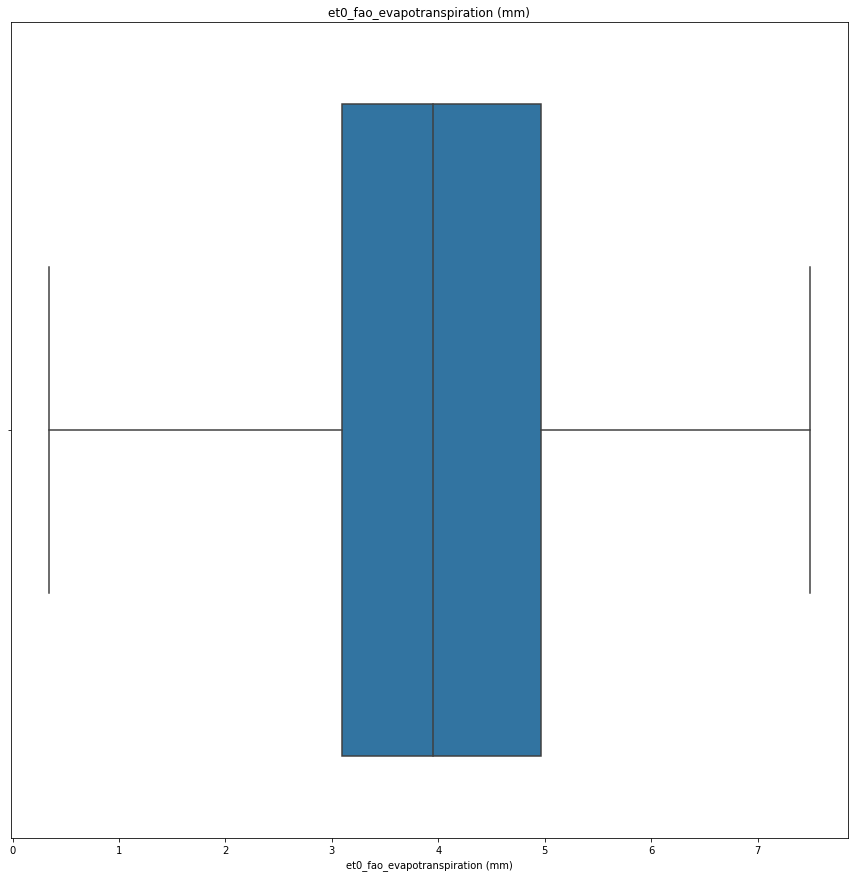

<Figure size 1080x1080 with 0 Axes>

In [89]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Since outliers are found we need to replace it with median

In [90]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [91]:
df.isnull().sum()*100/len(df)

time                               0.0
weathercode (wmo code)             0.0
temperature_2m_mean (°C)           0.0
rain_sum (mm)                      0.0
precipitation_hours (h)            0.0
windspeed_10m_max (km/h)           0.0
winddirection_10m_dominant (°)     0.0
et0_fao_evapotranspiration (mm)    0.0
dtype: float64

In [92]:
df.columns

Index(['time', 'weathercode (wmo code)', 'temperature_2m_mean (°C)',
       'rain_sum (mm)', 'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [93]:
# extracting day,month, day of week and weekdays/weekend from date column
df['time']=pd.to_datetime(df['time'])
df['month'] = df['time'].apply(lambda x : x.month)
df['week_number'] = df['time'].dt.strftime("%U")

In [94]:
df = df.drop(columns = ['time'])

In [95]:
df.columns

Index(['weathercode (wmo code)', 'temperature_2m_mean (°C)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'month', 'week_number'],
      dtype='object')

**Modelling for Regression Models**

**Linear Regression**

In [96]:
final_features = ['weathercode (wmo code)','temperature_2m_mean (°C)', 'precipitation_hours (h)','et0_fao_evapotranspiration (mm)','winddirection_10m_dominant (°)', 'month','windspeed_10m_max (km/h)']

In [97]:
#transformation of data 
from scipy.stats import zscore

X = df[final_features]


In [98]:
#Target variable
y = df['rain_sum (mm)']

In [99]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [100]:
#Implementing Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_
regressor.coef_
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)


In [101]:
# Intercept Values
regressor.intercept_

3.88708820249873

In [102]:
# Coefficent Values
regressor.coef_

array([-0.01472262, -0.0595163 ,  0.84003122, -0.1331497 ,  0.00329629,
       -0.01387064, -0.18064714])

In [103]:
# Mean Square Error 
mean_squared_error(y_test, y_pred)

9.190116010109444

In [104]:
#R2 Score values for train and test split
r2_score(y_train, y_pred_train)

0.6100075540912642

In [105]:
r2_score(y_test, y_pred)

0.6016431989216597

In [106]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.5884899083200165


Inference: R2 for train and test split prediction is 0.59 we conclude that a model performance is low.

**Implementing Lasso Regressor**

In [107]:
#import Lasso regressor and grid search cv
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_ = Lasso()

In [108]:

alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.6022242616365868
train Score:  0.6100037906335658
alpha:  0.025
test Score:  0.6030646088091804
train Score:  0.6099843486553462
alpha:  0.5
test Score:  0.6200705241721822
train Score:  0.6081537413769305
alpha:  0.75
test Score:  0.6245369458458874
train Score:  0.6071677853421946
alpha:  1
test Score:  0.6282418384201027
train Score:  0.60578830587938


In [109]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [110]:
y_test_pred = lasso.predict(X_test)

print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 9.176710857379845
RMSE is 3.0293086434663348
MAE is 1.902597121304652


In [111]:
r2 = r2_score(y_test, y_test_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6022242616365868
Adjusted R2 :  0.5890901570679836


Inference: R2 for train and test split prediction is 0.59 after applying Lasso Regression we conclude that a model performance is low.

**XGBOOST REGRESSION**

In [114]:
X = df[final_features]
#Target variable
y = df['rain_sum (mm)']

In [115]:
#Splitting the data into Training Data and Testing Data


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1097, 7) (987, 7) (110, 7)


In [116]:
#MACHINE LEARNING MODEL

#By using XGBOOST REGRESSOR

from xgboost import XGBRegressor
regressor= XGBRegressor()
     

regressor.fit(X_train, y_train)

[14:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [117]:
#Evaluation
from sklearn import metrics

# prediction on training data
train_data_prediction=regressor.predict(X_train)
     
#*The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model.*


# R Squared Value
r2_train=metrics.r2_score(y_train,train_data_prediction)
     

print('The R Squared Value = ',r2_train)

The R Squared Value =  0.9588253810442777


Inference: R2 for train and test split prediction is 0.89 .we conclude that a model performance is very good.

**Conclusion**
We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression ( Lasso),XGboost regresssor   and also found the important features for training the model. Out of them XGboost  gave the best result which is 95%